In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", rc={'figure.figsize':(11,9)})
sns.set_palette('colorblind');

# [seaborn.FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

Multi-plot grid for plotting conditional relationships.

#### Initialize a 2x2 grid of facets using the tips dataset:

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


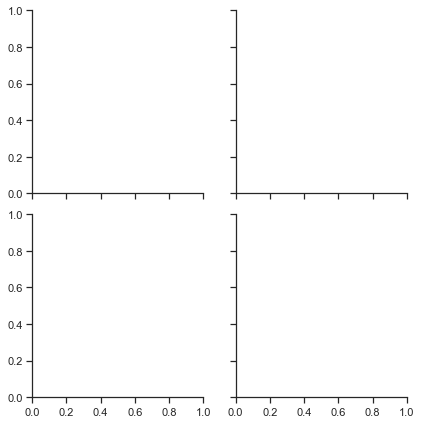

In [3]:
g = sns.FacetGrid(tips, col = 'time', row = 'smoker');

#### Draw a univariate plot on each facet using `map`:

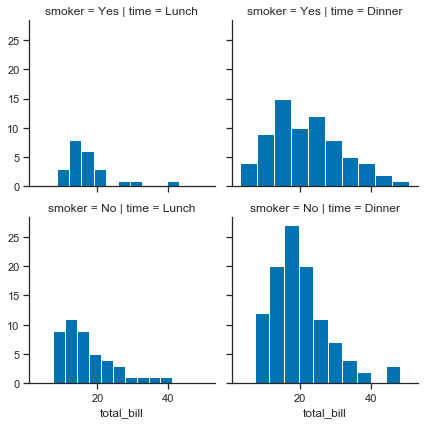

In [4]:
g = sns.FacetGrid(tips, col = 'time', row = 'smoker');
g = g.map(plt.hist, 'total_bill');

#### Pass additional keyword arguments to the mapped function:
Here we will be passig `bin` size.

In [5]:
bins = np.arange(0, 65, 5)
bins

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])

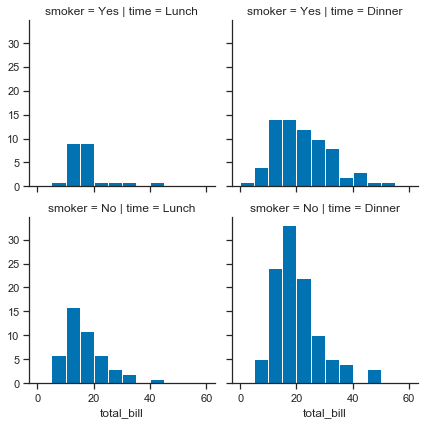

In [6]:
g = sns.FacetGrid(tips, col = 'time', row = 'smoker');
g = g.map(plt.hist, 'total_bill', bins = bins);

#### Plot a bivariate function on each facet:

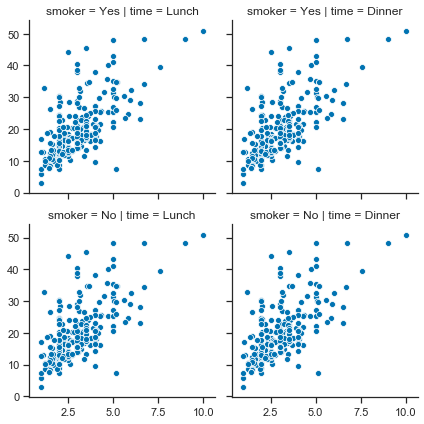

In [7]:
g = sns.FacetGrid(tips, col = 'time', row = 'smoker');
g = g.map(sns.scatterplot, data = tips, x = "tip", y = "total_bill");

#### Assign one of the variables to the color of the plot elements:

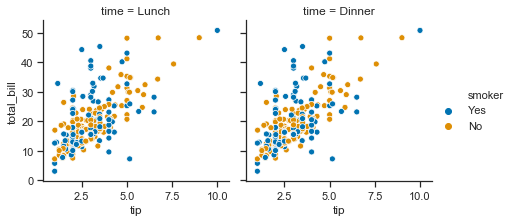

In [8]:
g = sns.FacetGrid(tips, col = 'time');
g = ((g.map(sns.scatterplot, data = tips, x = "tip", y = "total_bill", hue = 'smoker').add_legend())
     .set_xlabels('tip')).set_ylabels('total_bill');

#### Change the height and aspect ratio of each facet:

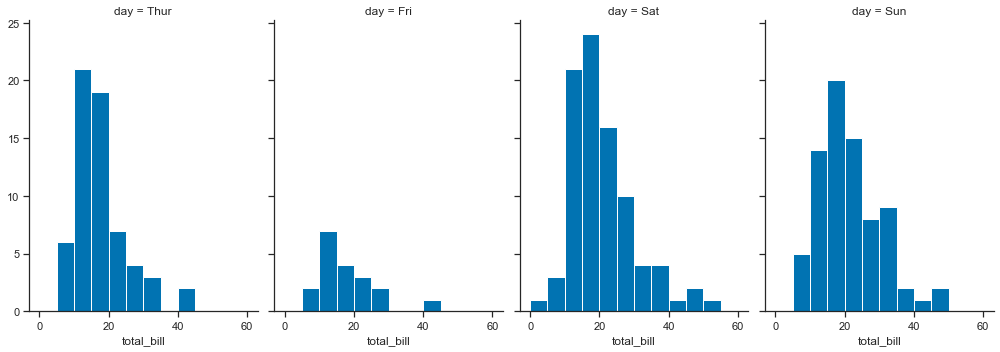

In [9]:
g = sns.FacetGrid(tips, col = 'day', height = 5, aspect = 0.7);
g = g.map(plt.hist, 'total_bill', bins = bins);

#### Specify the order for plot elements:

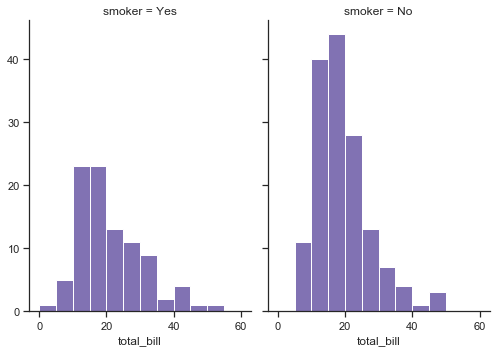

In [10]:
g = sns.FacetGrid(tips, col = 'smoker', col_order=['Yes', 'No'], height = 5, aspect = 0.7);
g = g.map(plt.hist, 'total_bill', bins = bins, color = 'm');

#### Use a different color palette:

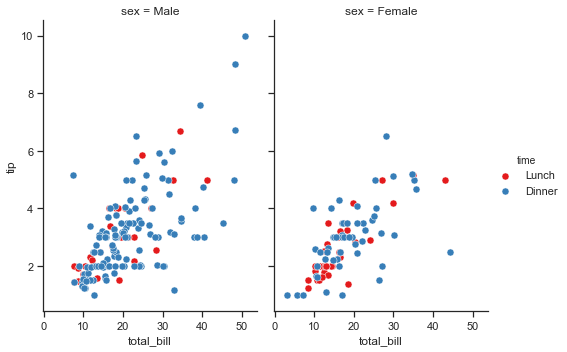

In [11]:
kws = dict(s = 50, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(tips, col = 'sex', hue = 'time', palette="Set1", height = 5, aspect = 0.7);
g = (g.map(plt.scatter, 'total_bill', 'tip', **kws).add_legend());

#### Use a dictionary mapping hue levels to colors:

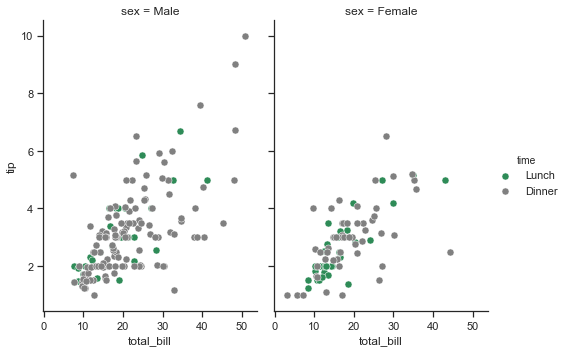

In [12]:
pal = dict(Lunch="seagreen", Dinner="gray")
g = sns.FacetGrid(tips, col = 'sex', hue = 'time', palette=pal, height = 5, aspect = 0.7);
g = (g.map(plt.scatter, 'total_bill', 'tip', **kws).add_legend());

#### Additionally use a different marker for the hue levels:

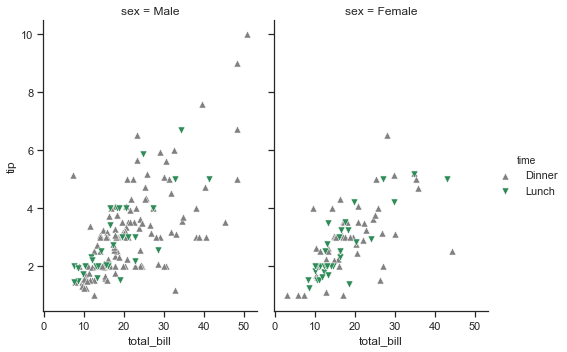

In [13]:
g = sns.FacetGrid(tips, col="sex", hue="time", palette=pal, hue_order=["Dinner", "Lunch"], height = 5, aspect = 0.7,
                  hue_kws=dict(marker=["^", "v"]))
g = (g.map(plt.scatter, "total_bill", "tip", **kws).add_legend())

#### “Wrap” a column variable with many levels into the rows:

`col_wrap` - “Wrap” the column variable at this width, so that the column facets span multiple rows.

In [14]:
att = sns.load_dataset("attention")
att.head()

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


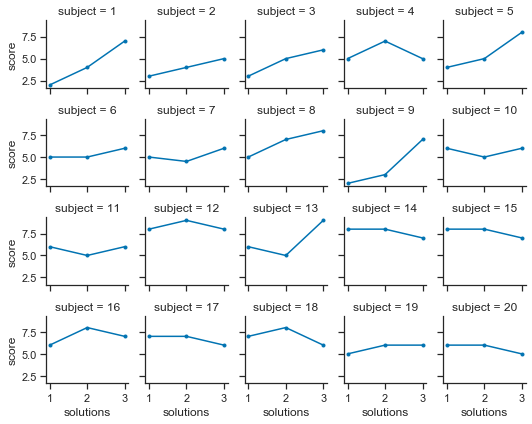

In [15]:
g = sns.FacetGrid(att, col="subject", col_wrap=5, height=1.5);
g = g.map(plt.plot, "solutions", "score", marker=".");

#### Use a different template for the facet titles:

In [16]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [17]:
tips['size'].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

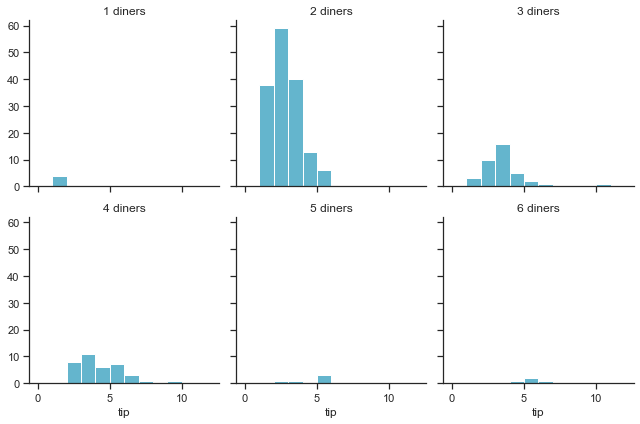

In [18]:
g = sns.FacetGrid(tips, col="size", col_wrap=3);
g = g.map(plt.hist, 'tip', bins=np.arange(0, 13), color = 'c').set_titles("{col_name} diners"); 

## Important seaborn figure methods

![](seaborn_methods.PNG)

***

#### Reference for more examples:

1. [Seaborn FacetGraph Documentation](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)